## Neighborhoods in Toronto ##

In [1]:
#install Beautifulsoup4 and other packages
!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge html5lib --yes
!conda install -c conda-forge geocoder --yes
!conda install -c conda-forge folium=0.5.0 --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    beautifulsoup4: 4.6.0-py35h442a8c9_1 --> 4.6.3-py35_0 conda-forge

beautifulsoup4 100% |################################| Time: 0:00:00   4.82 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    libxml2: 2.9.4-h6b072ca_5     --> 2.9.8-h422b904_2     conda-forge
    libxslt: 1.1.29-hcf9102b_5    --> 1.1.32-h88dbc4e_2    conda-forge
    lxml:    4.1.0-py35ha401a81_0 --> 4.2.5-py35hc9114bc_0 conda-forge

libxml2-2.9.8- 100% |################################| Time: 0:00:00  24.84 MB/s
libxslt-1.1.32 100% |################################| Time: 0:00:00  71.63 MB/s
lxml-4.2.5-py3 100% |################################| Time: 0:00:00  73.09 MB/s
Fetchin

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

### Scrape wiki page

In [3]:
source=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source, 'lxml')
#print(soup)
#print(table.prettify())

In [4]:
#read all neighourhood of Toronto from xml and load into dataframe
table=soup.find('table', attrs={'class':'wikitable sortable'})
table_rows=table.find_all('tr')
res=[]
i=0
for tr in table_rows:
     td=tr.find_all('td')
     row=[tr.text.strip() for tr in td if tr.text.strip()]
     if row:
            res.append(row)

df=pd.DataFrame(res,columns=["Postcode","Borough","Neighbourhood"])
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [5]:
df1=df[df['Borough']!= 'Not assigned']
df1.shape

(212, 3)

In [6]:
print("Before: ", df1[df1['Neighbourhood'] == 'Not assigned'].shape)
df1['Neighbourhood'].replace(regex='Not assigned', value=df1['Borough'], inplace=True)
print("After: ", df1[df1['Neighbourhood'] == 'Not assigned'].shape)

Before:  (1, 3)
After:  (0, 3)


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
#group all neighbourhood by postcode
#df2=df1.groupby(['Postcode','Borough'])['Neighbourhood'].apply(list)
df2=df1.groupby(['Postcode','Borough'])['Neighbourhood'].agg(lambda x: ', '.join(x))
df2=pd.DataFrame(df2.reset_index())
df2

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [7]:
df2.shape

(103, 3)

In [24]:
#import geocoder # to get lat & log for postal code
#lat_lng_coords = None
#g = geocoder.google('M1C')
#g.latlng

### Since above package not giving desire result....hence using CSV file

In [8]:
#download and read lat & lng of Troronto postal code data
!wget -q -O 'Geospatial_Coordinates.csv' http://cocl.us/Geospatial_data

In [9]:
latlng=pd.read_csv("Geospatial_Coordinates.csv")
latlng.columns=["Postcode", "Latitude", "Longitude"]
print ('Neighbourhood df: ', df2.shape)
print ('post code lat n lng df: ', latlng.shape)

Neighbourhood df:  (103, 3)
post code lat n lng df:  (103, 3)


In [10]:
#join two dataframes
df3=pd.merge(df2, latlng, on='Postcode')
df3

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Cluster neighbourhood in Toronto

In [11]:
#get lat n lng value of Toronto city
address = 'Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Lat n lng of Toronto city are {},{}'.format(latitude, longitude))

Lat n lng of Toronto city are 43.653963,-79.387207


In [12]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighbourhood']):
    label='{}, {}'.format(borough, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
#        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Exploring only neighborhoods in the burough of Central Toronto

In [13]:
central_toronto = df3[df3['Borough']=='Central Toronto'].reset_index(drop=True)
central_toronto

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049
6,M5N,Central Toronto,Roselawn,43.711695,-79.416936
7,M5P,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678


 ### @ Define Foursquare credentials and version

In [14]:
# @hidden
CLIENT_ID = 'BWYQC1IULNXVCBZYL3B3T40NVPQTKTTTNZT2KF05PJ1AZY5J' # your Foursquare ID
CLIENT_SECRET = 'ZIBXILQN11EF2Y20C4I4RHZGTP0ZIKU3TGPSK5KAIK5U5VAN' # your Foursquare Secret
VERSION = '20181111' # Foursquare API version
radius = 2000 #set radius parameter to be searched

In [15]:
def getNearbyLaundryVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'Indian Restaurant',
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Indian restaurant near cenral Toronto

In [16]:
ind_res = getNearbyLaundryVenues(central_toronto['Neighbourhood'],central_toronto["Latitude"],central_toronto['Longitude'])
ind_res.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.72802,-79.38879,Indian Bread Bar,43.730148,-79.403153,North Indian Restaurant
1,Lawrence Park,43.72802,-79.38879,Banjara Indian Cuisine,43.707810,-79.393296,Indian Restaurant
2,Lawrence Park,43.72802,-79.38879,Alleycatz Live Jazz Bar,43.710548,-79.398827,Jazz Club
3,Lawrence Park,43.72802,-79.38879,Toronto Indian Road YMCA Centre,43.735016,-79.406063,Daycare
4,Lawrence Park,43.72802,-79.38879,Herbs Restaurant,43.726178,-79.399680,Bar


In [17]:
ind_res.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Davisville,44,44,44,44,44,44
Davisville North,41,41,41,41,41,41
"Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West",45,45,45,45,45,45
"Forest Hill North, Forest Hill West",45,45,45,45,45,45
Lawrence Park,26,26,26,26,26,26


In [18]:
# One hot encoding

ind_res_hot_code = pd.get_dummies(ind_res[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ind_res_hot_code['Neighborhood'] = ind_res['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ind_res_hot_code.columns[-1]] + list(ind_res_hot_code.columns[:-1])
ind_res_hot_code = ind_res_hot_code[fixed_columns]
ind_res_hot_code.head()

,Neighborhood,American Restaurant,Asian Restaurant,Astrologer,BBQ Joint,Bar,Bistro,Breakfast Spot,Café,Cantonese Restaurant,...,North Indian Restaurant,Office,Pub,Restaurant,Sandwich Place,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lawrence Park,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ind_res_grouped = ind_res_hot_code.groupby('Neighborhood').mean().reset_index()
ind_res_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Astrologer,BBQ Joint,Bar,Bistro,Breakfast Spot,Café,Cantonese Restaurant,...,North Indian Restaurant,Office,Pub,Restaurant,Sandwich Place,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Davisville,0.000000,0.022727,0.0,0.000000,0.000000,0.000000,0.045455,0.000000,0.022727,...,0.000000,0.022727,0.022727,0.113636,0.022727,0.045455,0.045455,0.022727,0.068182,0.000000
1,Davisville North,0.000000,0.024390,0.0,0.024390,0.024390,0.000000,0.048780,0.000000,0.000000,...,0.000000,0.024390,0.024390,0.121951,0.024390,0.048780,0.048780,0.000000,0.073171,0.000000
2,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0.022222,0.000000,0.0,0.000000,0.000000,0.022222,0.000000,0.022222,0.022222,...,0.000000,0.000000,0.000000,0.133333,0.044444,0.000000,0.022222,0.022222,0.022222,0.022222
3,"Forest Hill North, Forest Hill West",0.000000,0.022222,0.0,0.000000,0.000000,0.000000,0.022222,0.022222,0.022222,...,0.000000,0.022222,0.022222,0.111111,0.022222,0.044444,0.022222,0.022222,0.066667,0.000000
4,Lawrence Park,0.000000,0.038462,0.0,0.038462,0.038462,0.000000,0.076923,0.000000,0.000000,...,0.038462,0.038462,0.000000,0.153846,0.038462,0.038462,0.000000,0.000000,0.115385,0.000000


In [20]:
num_top_venues = 5
for hood in ind_res_grouped['Neighborhood'][:3]:
    print("----"+hood+"----")
    temp =ind_res_grouped[ind_res_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Davisville----
                venue  freq
0   Indian Restaurant  0.16
1          Restaurant  0.11
2  Italian Restaurant  0.09
3     Thai Restaurant  0.07
4    Sushi Restaurant  0.05


----Davisville North----
                venue  freq
0   Indian Restaurant  0.15
1          Restaurant  0.12
2     Thai Restaurant  0.07
3  Italian Restaurant  0.07
4               Diner  0.05


----Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West----
                 venue  freq
0    Indian Restaurant  0.16
1           Restaurant  0.13
2   Chinese Restaurant  0.07
3   Italian Restaurant  0.07
4  Japanese Restaurant  0.07




In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ind_res_grouped['Neighborhood']

for ind in np.arange(ind_res_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ind_res_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Davisville,Indian Restaurant,Restaurant,Italian Restaurant,Thai Restaurant,Diner,Breakfast Spot,Sushi Restaurant,Steakhouse,Japanese Restaurant,Capitol Building
1,Davisville North,Indian Restaurant,Restaurant,Thai Restaurant,Italian Restaurant,Diner,Sushi Restaurant,Steakhouse,Breakfast Spot,Jazz Club,Eastern European Restaurant
2,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Indian Restaurant,Restaurant,Italian Restaurant,Chinese Restaurant,Japanese Restaurant,New American Restaurant,Hotel,Sandwich Place,Thai Restaurant,French Restaurant
3,"Forest Hill North, Forest Hill West",Restaurant,Italian Restaurant,Indian Restaurant,Diner,Japanese Restaurant,Thai Restaurant,Steakhouse,Chinese Restaurant,General Entertainment,Cantonese Restaurant
4,Lawrence Park,Restaurant,Italian Restaurant,Thai Restaurant,Diner,Breakfast Spot,Indian Restaurant,Japanese Restaurant,Jazz Club,Churrascaria,Daycare


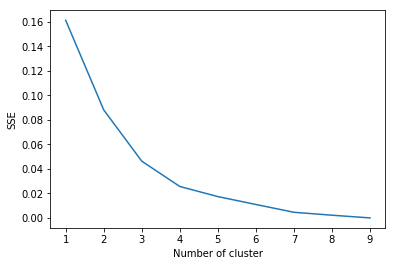

In [23]:
ind_res_grouped_clustering = ind_res_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ind_res_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
kclusters = 4

ind_res_grouped_clustering = ind_res_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ind_res_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 2, 3, 0, 3, 3, 1], dtype=int32)

In [31]:
ind_res_merged = central_toronto
ind_res_merged.columns= ['Postcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude', 'Cluster Labels']
# add clustering labels
ind_res_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ind_res_merged = ind_res_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ind_res_merged.head()# check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Restaurant,Italian Restaurant,Thai Restaurant,Diner,Breakfast Spot,Indian Restaurant,Japanese Restaurant,Jazz Club,Churrascaria,Daycare
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197,2,Indian Restaurant,Restaurant,Thai Restaurant,Italian Restaurant,Diner,Sushi Restaurant,Steakhouse,Breakfast Spot,Jazz Club,Eastern European Restaurant
2,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,0,Restaurant,Italian Restaurant,Diner,Thai Restaurant,Indian Restaurant,Breakfast Spot,Steakhouse,Sandwich Place,Jazz Club,Eastern European Restaurant
3,M4S,Central Toronto,Davisville,43.704324,-79.388790,2,Indian Restaurant,Restaurant,Italian Restaurant,Thai Restaurant,Diner,Breakfast Spot,Sushi Restaurant,Steakhouse,Japanese Restaurant,Capitol Building
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,3,Indian Restaurant,Restaurant,Chinese Restaurant,Italian Restaurant,New American Restaurant,Sandwich Place,Japanese Restaurant,Filipino Restaurant,Moroccan Restaurant,Hotel


In [32]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(ind_res_merged['Latitude'], ind_res_merged['Longitude'], ind_res_merged['Neighborhood'], ind_res_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


### Cluster 1

In [37]:
cls1=ind_res_merged.loc[ind_res_merged['Cluster Labels'] == 0,ind_res_merged.columns[[2] + list(range(5, ind_res_merged.shape[1]))]]
cls1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,North Toronto West,0,Restaurant,Italian Restaurant,Diner,Thai Restaurant,Indian Restaurant,Breakfast Spot,Steakhouse,Sandwich Place,Jazz Club,Eastern European Restaurant
5,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0,Indian Restaurant,Restaurant,Italian Restaurant,Chinese Restaurant,Japanese Restaurant,New American Restaurant,Hotel,Sandwich Place,Thai Restaurant,French Restaurant


### Cluster 2

In [38]:
cls2=ind_res_merged.loc[ind_res_merged['Cluster Labels'] == 1,ind_res_merged.columns[[2] + list(range(5, ind_res_merged.shape[1]))]]
cls2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"The Annex, North Midtown, Yorkville",1,Korean Restaurant,Restaurant,Indian Restaurant,Chinese Restaurant,Italian Restaurant,New American Restaurant,Nightclub,Eastern European Restaurant,Event Space,Ethiopian Restaurant


### Cluster 3

In [39]:
cls3=ind_res_merged.loc[ind_res_merged['Cluster Labels'] == 2,ind_res_merged.columns[[2] + list(range(5, ind_res_merged.shape[1]))]]
cls3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lawrence Park,2,Restaurant,Italian Restaurant,Thai Restaurant,Diner,Breakfast Spot,Indian Restaurant,Japanese Restaurant,Jazz Club,Churrascaria,Daycare
1,Davisville North,2,Indian Restaurant,Restaurant,Thai Restaurant,Italian Restaurant,Diner,Sushi Restaurant,Steakhouse,Breakfast Spot,Jazz Club,Eastern European Restaurant
3,Davisville,2,Indian Restaurant,Restaurant,Italian Restaurant,Thai Restaurant,Diner,Breakfast Spot,Sushi Restaurant,Steakhouse,Japanese Restaurant,Capitol Building


### Cluster 4

In [40]:
cls4=ind_res_merged.loc[ind_res_merged['Cluster Labels'] == 3,ind_res_merged.columns[[2] + list(range(5, ind_res_merged.shape[1]))]]
cls4

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Moore Park, Summerhill East",3,Indian Restaurant,Restaurant,Chinese Restaurant,Italian Restaurant,New American Restaurant,Sandwich Place,Japanese Restaurant,Filipino Restaurant,Moroccan Restaurant,Hotel
6,Roselawn,3,Restaurant,Italian Restaurant,Diner,Steakhouse,Sandwich Place,Thai Restaurant,Indian Restaurant,Breakfast Spot,General Entertainment,Middle Eastern Restaurant
7,"Forest Hill North, Forest Hill West",3,Restaurant,Italian Restaurant,Indian Restaurant,Diner,Japanese Restaurant,Thai Restaurant,Steakhouse,Chinese Restaurant,General Entertainment,Cantonese Restaurant


In [46]:
clusters=pd.DataFrame({"Cluster1":cls1["Neighborhood"],
                      "Cluster2":cls2["Neighborhood"],
                      "Cluster3":cls3["Neighborhood"],
                      "Cluster4":cls4["Neighborhood"] 
                      })
clusters.replace(np.nan, '', regex=True, inplace = True)
clusters

,Cluster1,Cluster2,Cluster3,Cluster4
0,,,Lawrence Park,
1,,,Davisville North,
2,North Toronto West,,,
3,,,Davisville,
4,,,,"Moore Park, Summerhill East"
5,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",,,
6,,,,Roselawn
7,,,,"Forest Hill North, Forest Hill West"
8,,"The Annex, North Midtown, Yorkville",,


In [ ]:
#### We can see there are few places in central Toronto having indian restaurant as per cluster analysis.